# **Análise de série temporal do consumo de energia elétrica jan/1985 a jan/2018**


In [140]:
#importar pacotes e personalizar configurações de gráficos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

sns.set_style()

%matplotlib inline

In [144]:
#url do conjunto de dados
dataset_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
#criar um dataframe para o arquivo csv
df = pd.read_csv(dataset_path)
#visualizar o conjunto de dados
df
#df.head() #visualizar as primeiras colunas do banco de dados

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [145]:
#Converter a coluna DATE (tempo) para datetime e associar ao index do dateframe

df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")
df.set_index('DATE', inplace=True)
df.head(13)



,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
1985-06-01,58.0904
1985-07-01,62.6202
1985-08-01,63.2485
1985-09-01,60.5846


### **a) Classificação: a série temporal em estudo é discreta, pois as observações foram coletadas diariamente, ou seja, em intervalos específicos de tempo.**

### **b) Estatística descritiva da séries de consumo de energia elétrica**

In [146]:
# Estatísticas descritivas
estatisticas = df.Value.describe()
print(estatisticas)

count    397.000000
mean      88.847218
std       15.387834
min       55.315100
25%       77.105200
50%       89.779500
75%      100.524400
max      129.404800
Name: Value, dtype: float64


### **Boxplot emparelhado do consumo de energia por mês**

In [147]:
# Extraindo o mês e o dia da semana a partir do índice datetime
df['Mês'] = df.index.month_name().str.slice(stop=3)  # Abreviação do nome do mês
df['Dia_da_Semana'] = df.index.day_name()  # Nome completo do dia da semana

print(df.head())

              Value  Mês Dia_da_Semana
DATE                                  
1985-01-01  72.5052  Jan       Tuesday
1985-02-01  70.6720  Feb        Friday
1985-03-01  62.4502  Mar        Friday
1985-04-01  57.4714  Apr        Monday
1985-05-01  55.3151  May     Wednesday


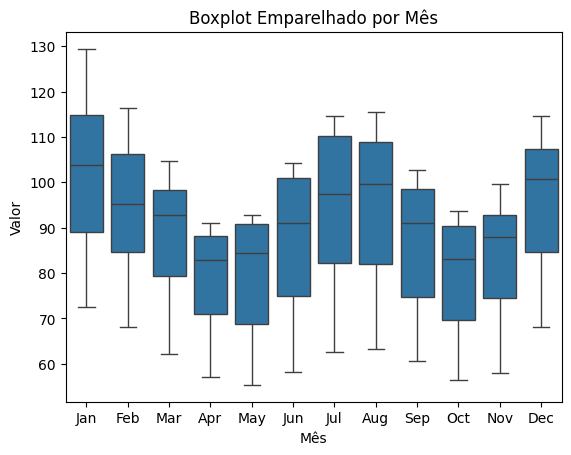

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

#create seaborn boxplots by group
sns.boxplot(x='Mês', y='Value', data=df)
plt.title('Boxplot Emparelhado por Mês')
plt.suptitle('')  # Remove o título padrão "Boxplot grouped by Mês"
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.show()

### **c) Gráfico da série temporal no domínio da frequência**

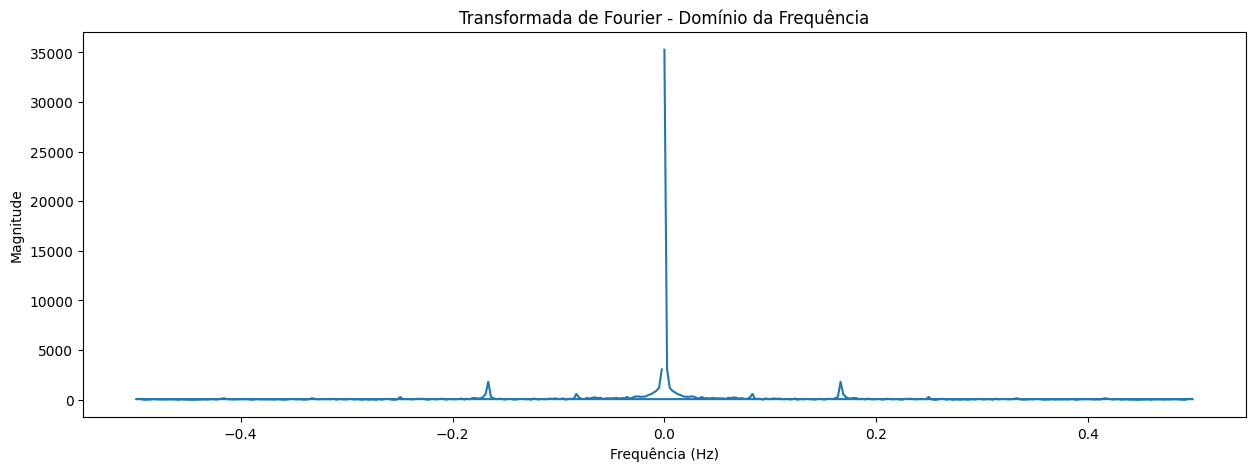

In [149]:
#Gráfico no domínio da frequência
import numpy as np
import matplotlib.pyplot as plt

# Aplicar a Transformada Rápida de Fourier (FFT)
serie_frequencia = np.fft.fft(df.Value)

# Frequências correspondentes
frequencias = np.fft.fftfreq(len(df.Value))

# Plotar a série no domínio da frequência
plt.figure(figsize=(15, 5))
plt.plot(frequencias, np.abs(serie_frequencia))
plt.title('Transformada de Fourier - Domínio da Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.show()


### **d) Gráfico da série temporal no domínio do tempo**

In [150]:
# Remover a coluna 'Mês' e 'Dia_da_Semana'  usando 'del'
del df['Mês']
del df['Dia_da_Semana']
print(df.head())


              Value
DATE               
1985-01-01  72.5052
1985-02-01  70.6720
1985-03-01  62.4502
1985-04-01  57.4714
1985-05-01  55.3151


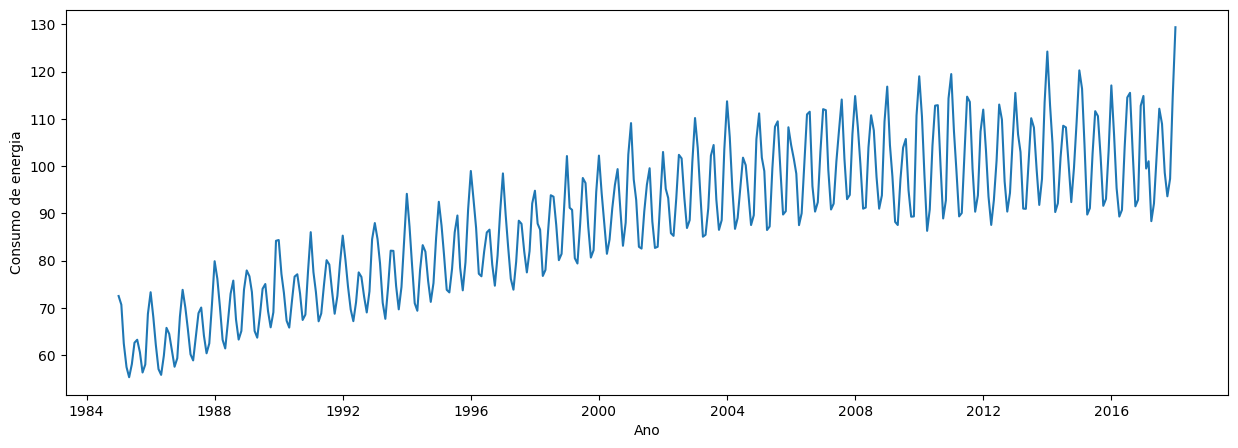

In [151]:
#Gráfico no domínio do tempo
#Representação gráfica da séries temporal do consumo de energia elétrica
plt.figure(figsize=(15, 5))
plt.plot(df)
plt.title('')
plt.xlabel('Ano')
plt.ylabel('Consumo de energia')
plt.show()


### **e) Média e variância dos dados**



### **f) Decomposição da Série temporal**

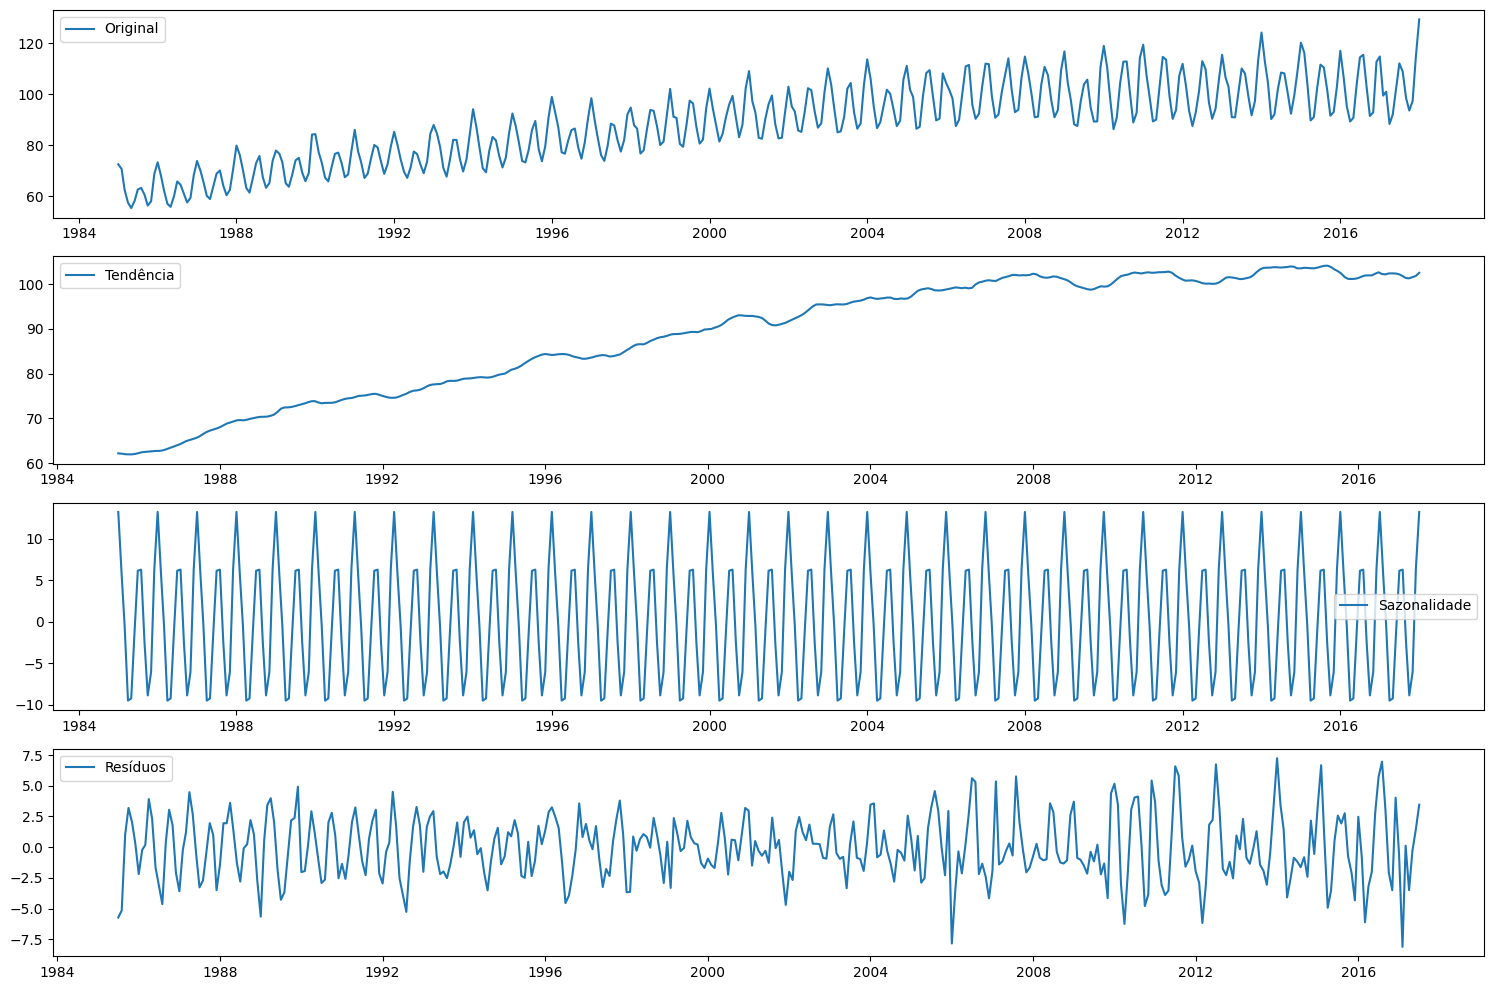

In [152]:
# Decomposição aditiva
decomposition = seasonal_decompose(df, model='additive', period=12) #model= 'multiplicative' ou 'additive'

# Plotar os componentes
plt.figure(figsize=(15, 10))

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(decomposition.resid, label='Resíduos')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Plotar os componentes
#fig = decomposition.plot()
#plt.show()

### **Extração da componente sazonal para entender o período de maior demanda do consumo de energia elétrica**

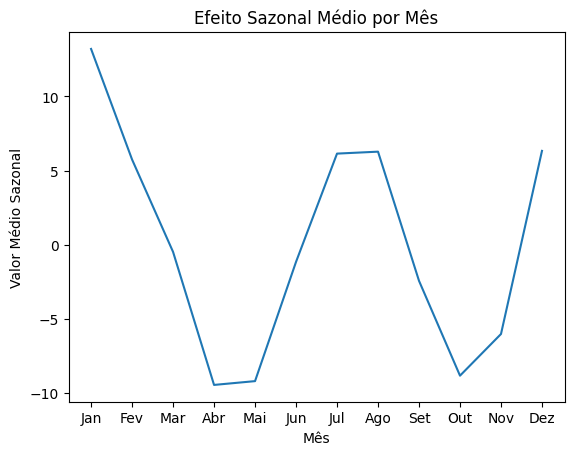

In [153]:
# Extração da componente sazonal
seasonal = decomposition.seasonal

# Agrupando por mês para visualizar o efeito sazonal médio de cada mês
seasonal_monthly = seasonal.groupby(seasonal.index.month).mean()

# Plotando o efeito sazonal por mês
seasonal_monthly.plot(kind='line')
plt.title('Efeito Sazonal Médio por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio Sazonal')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
plt.show()

### **g) Verificar estacionariedade (média e variância constante)**

### **1) Correlograma**

Pontos fora da faixa de confiança pode indicar autocorrelação temporal da série positiva, ou seja, uma tendência significativa

<Figure size 1500x500 with 0 Axes>

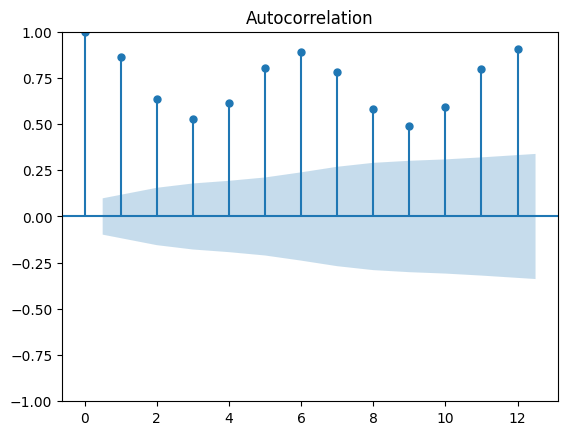

<Figure size 1500x500 with 0 Axes>

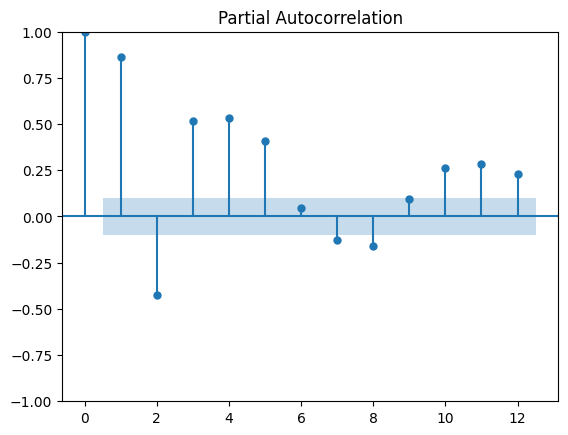

In [154]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plotando a função de autocorrelação
plt.figure(figsize=(15, 5))
plot_acf(df, lags=12)
plt.show()

# Plotando a função de autocorrelação parcial
plt.figure(figsize=(15, 5))
plot_pacf(df, lags=12)
plt.show()

### **2) Teste de Dickey-Fuller Aumentado para verificar estacionariedade**

H0: a series não é estacionária

H1: a series é estacionária.

pvalor< alpha (nível de significância geralmente 5%) = rejeita-se H0

In [155]:
# aplicar ADF e imprimir o resultado
from statsmodels.tsa.stattools import adfuller # importar o teste ADF
result = adfuller(df)
print('Dickey-Fuller Aumentado')
print('Teste Estatístico: {:.4f}'.format(result[0]))
print('Valor-p: {:.4f}'.format(result[1]))
print('Valores Críticos:')
for key, value in result[4].items():
     print('\t{}: {:.4f}'.format(key, value))

# Interpretação do resultado
if result[1] < 0.05:
    print("A série é estacionária (Rejeita H0).")
else:
   print("A série não é estacionária (Não rejeita H0).")

Dickey-Fuller Aumentado
Teste Estatístico: -2.2570
Valor-p: 0.1862
Valores Críticos:
	1%: -3.4476
	5%: -2.8692
	10%: -2.5708
A série não é estacionária (Não rejeita H0).


### **3) Teste de Mann Kendall para verificar Tendência**

H0: Nao existe tendência significativa

H1: Existe tendência significativa

pvalor < nível de significância de 5% rejeita H0

In [156]:
#pip install pymannkendall
import pymannkendall as mk

In [157]:
result = mk.original_test(df['Value'])
print(result)
print('Teste de Mann_Kendall')
print('Teste Estatístico: {:.4f}'.format(result[3]))
print('Valor-p: {:.4f}'.format(result[2]))
print('Tipo de Tendência: {:s}'.format(result[0]))

# Interpretação do resultado
if result[2] < 0.05:
    print("A série apresenta tendência significativa (Rejeita H0).")
else:
   print("A série não apresenta tendência significativa(Não rejeita H0).")


Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=19.125339232804578, Tau=0.6427499173091112, s=50524.0, var_s=6978466.0, slope=0.11486610139860137, intercept=67.03601192307693)
Teste de Mann_Kendall
Teste Estatístico: 19.1253
Valor-p: 0.0000
Tipo de Tendência: increasing
A série apresenta tendência significativa (Rejeita H0).


### **4) Teste de Ljungbox para verificar autocorrelação sazonal**

In [158]:

from statsmodels.stats.diagnostic import acorr_ljungbox

# Decomposição STL
stl = sm.tsa.seasonal_decompose(df['Value'], period=12)  # period depende da sua série

# Teste de Ljung-Box nos resíduos
residuals = stl.resid.dropna()
ljung_box_test = acorr_ljungbox(residuals, lags=[12], return_df=True)
print(ljung_box_test)

print('Teste de Ljung-Box')
print('Teste Estatístico: {:.4f}'.format(ljung_box_test['lb_stat'].values[0]))
print('Valor-p: {:.4f}'.format(ljung_box_test['lb_pvalue'].values[0]))

# Interpretação do resultado
if ljung_box_test['lb_pvalue'].values[0] < 0.05:
    print("A série apresenta autocorrelação sazonal significativa (Rejeita H0).")
else:
    print("A série não apresenta autocorrelação sazonal significativa (Não rejeita H0).")


       lb_stat     lb_pvalue
12  342.060641  6.629303e-66
Teste de Ljung-Box
Teste Estatístico: 342.0606
Valor-p: 0.0000
A série apresenta autocorrelação sazonal significativa (Rejeita H0).


### **4) Teste para avaliar homogeneidade de Variância**

In [159]:
from scipy.stats import bartlett

# Exemplo de dados: três grupos diferentes
serie1 = df.Value[:198]
serie2 = df.Value[199:]


# Realizando o teste de Bartlett
estatistica, p_valor = bartlett(serie1,serie2)

# Exibindo os resultados
print(f'Estatística de Bartlett: {estatistica}')
print(f'Valor-p: {p_valor}')

# Interpretação do resultado
if p_valor < 0.05:
    print("As variâncias são significativamente diferentes (Rejeita H0).")
else:
    print("Não há evidências suficientes para afirmar que as variâncias são diferentes (Não rejeita H0).")


Estatística de Bartlett: 4.161042731121508
Valor-p: 0.041363932023817704
As variâncias são significativamente diferentes (Rejeita H0).


### **h) Método da diferenciação para transformar a série em estacionária**

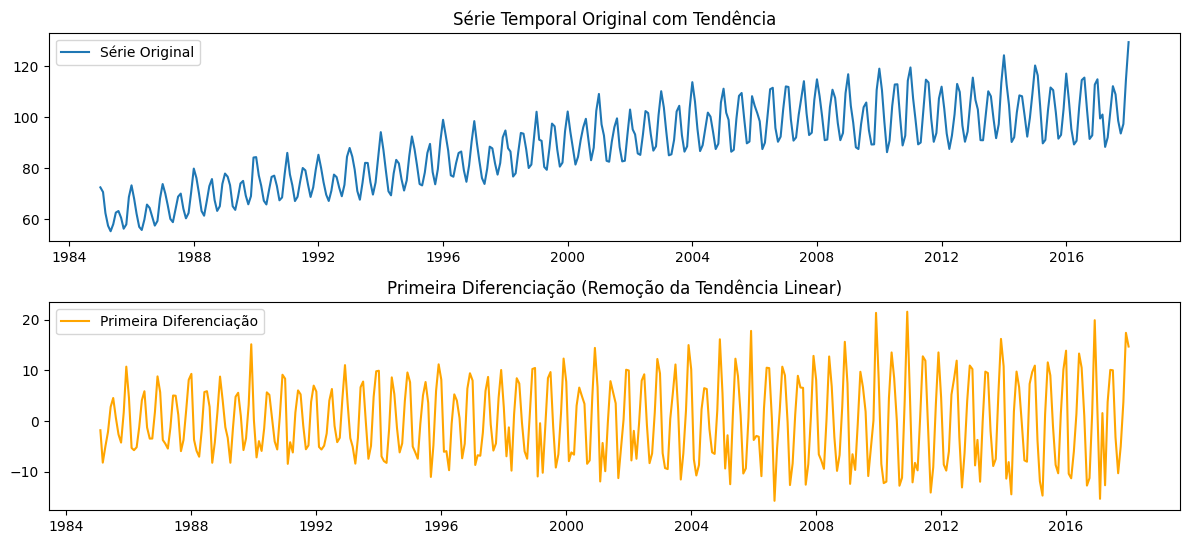

In [160]:
# Aplicar a primeira diferenciação
df['Primeira_Diferenca'] = df['Value'].diff()

#Aplicar a segunda diferenciação
#df['Segunda_Diferenca'] = df['Primeira_Diferenca'].diff()

# Visualizar os resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Value'], label='Série Original')
plt.title('Série Temporal Original com Tendência')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Primeira_Diferenca'], label='Primeira Diferenciação', color='orange')
plt.title('Primeira Diferenciação (Remoção da Tendência Linear)')
plt.legend()

#plt.subplot(3, 1, 3)
#plt.plot(df['Segunda_Diferenca'], label='Segunda Diferenciação', color='green')
#plt.title('Segunda Diferenciação (Remoção da Tendência Residual)')
#plt.legend()

plt.tight_layout()
plt.show()

### **i) Método de suavização**

A série em estudo apresenta tendência e sazonalidade então será aplicado o método de suavização de Holtwinters (Alisamento Exponencial triplo)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


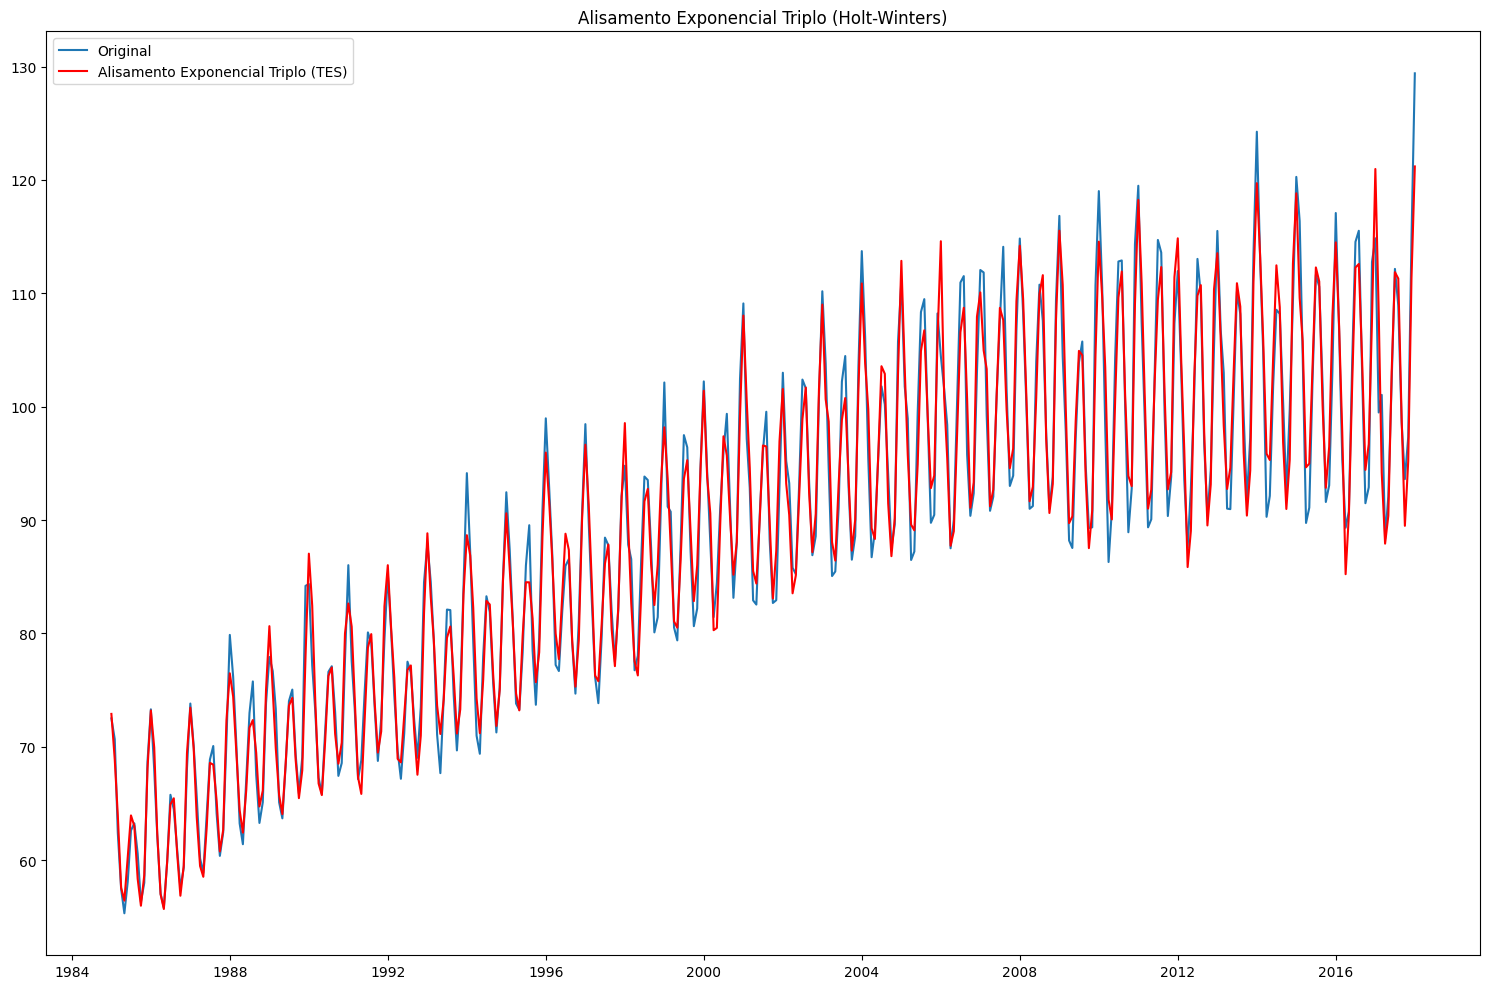

In [161]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12)
ajuste = modelo.fit()
df['TES'] = ajuste.fittedvalues

# Série original e Alisamento Exponencial Triplo
plt.figure(figsize=(15, 10))
plt.plot(df['Value'], label='Original')
plt.plot(df['TES'], label='Alisamento Exponencial Triplo (TES)', color='red')
plt.title('Alisamento Exponencial Triplo (Holt-Winters)')
plt.legend()

plt.tight_layout()
plt.show()

### **Método de média móvel: simples e exponencial**

O método de média móvel é indicado para avaliar a tendência da série, maspPela presença de sazonalidade o mais indicado para esse caso é a média móvel
exponencial

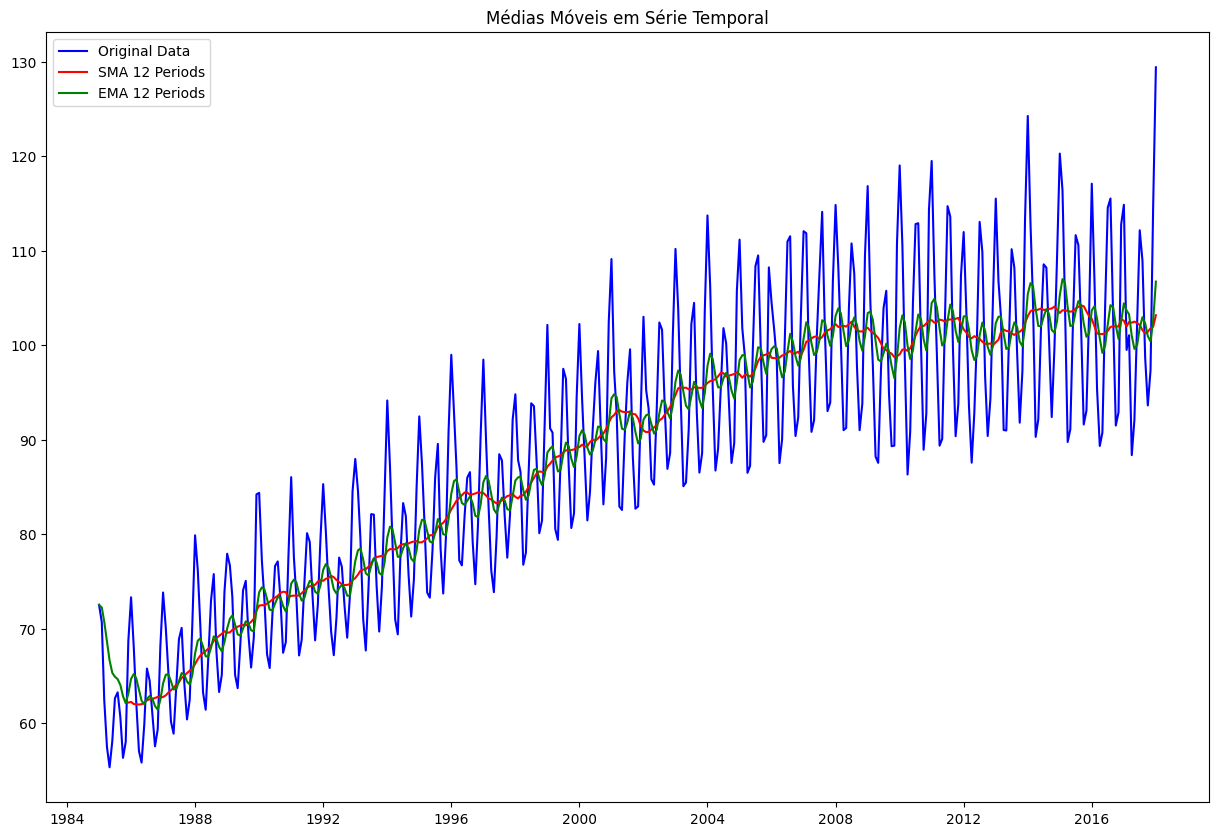

In [162]:

# Calcular a Média Móvel Simples (SMA)
window_size = 12
df['SMA'] = df['Value'].rolling(window=window_size).mean()

# Calcular a Média Móvel Exponencial (EMA)
df['EMA'] = df['Value'].ewm(span=window_size, adjust=False).mean()

# Plotar os resultados
plt.figure(figsize=(15, 10))
plt.plot(df['Value'], label='Original Data', color='blue')
plt.plot(df['SMA'], label=f'SMA {window_size} Periods', color='red')
plt.plot(df['EMA'], label=f'EMA {window_size} Periods', color='green')
plt.title('Médias Móveis em Série Temporal')
plt.legend()
plt.show()